# K - Nearest Neighbors with Python

In [1]:
# Import libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# read the dataset
df=pd.read_csv('Classified Data.csv',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


- after reading the dataset, We see that these data is calulated in different different units.
- therefore we standardize the variables and bring it back to normal scale, where all data is look simillar.

### Standardize the variables :

In [3]:
# For scaling we import StandardScaler from sklearn.preprocesing
from sklearn.preprocessing import StandardScaler

In [4]:
# create an object
scaler=StandardScaler()

In [5]:
# fit the data and droping the dependent feature
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [6]:
# Transform the data
scaled_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [7]:
# after transfroming data, it create an array
# so we convert it into DataFrame :
df_fit=pd.DataFrame(scaled_feature,columns=df.columns[:-1])
df_fit.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train Test Split

In [8]:
# import Train test split
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,df['TARGET CLASS'],test_size=0.3)

### Use KNN 

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# First we take K = 1
knn=KNeighborsClassifier(n_neighbors=1)

In [12]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
# Actual Output :
y_test

230    1
521    0
166    1
148    1
569    0
      ..
864    1
955    1
543    0
982    1
706    1
Name: TARGET CLASS, Length: 300, dtype: int64

In [14]:
# predicted Output :
y_pred=knn.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1], d

### Cheak our model

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[129  16]
 [ 17 138]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       145
           1       0.90      0.89      0.89       155

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



### chossing K value

In [17]:
error_rate=[]

# here we iterate K value from 1 - 40
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    i_pred=knn.predict(x_test)
    error_rate.append(np.mean(i_pred != y_test))

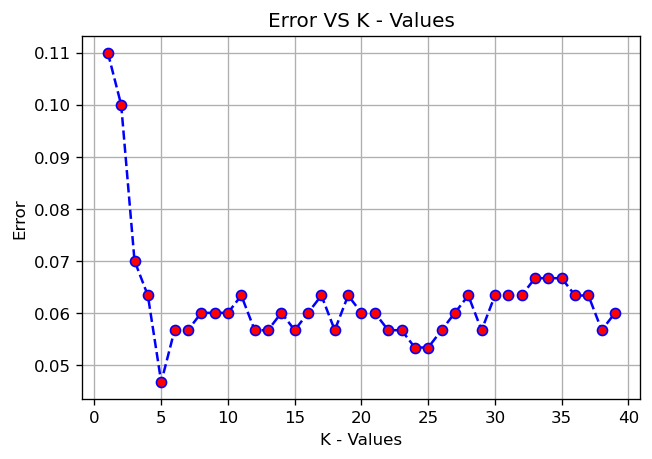

In [18]:
# Plot to visualize
plt.figure(dpi=120)
plt.plot(range(1,40),error_rate,color='blue',marker='o',linestyle='dashed',markerfacecolor='red')
plt.xlabel('K - Values')
plt.ylabel('Error')
plt.title('Error VS K - Values')
plt.grid()
plt.show()

In [19]:
# we choose K = 5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[138   7]
 [  7 148]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       145
           1       0.95      0.95      0.95       155

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## We see that the error is decrese if we choose right K value